## Analyzing Cremona from open street map data

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx
import mplleaflet
import shapely


In [2]:
# Let's get the data from Open Street Map
place_name = "Cremona, Italy"
graph = ox.graph_from_place(place_name, network_type='drive', which_result= 2)
prj_G = ox.projection.project_graph(graph)


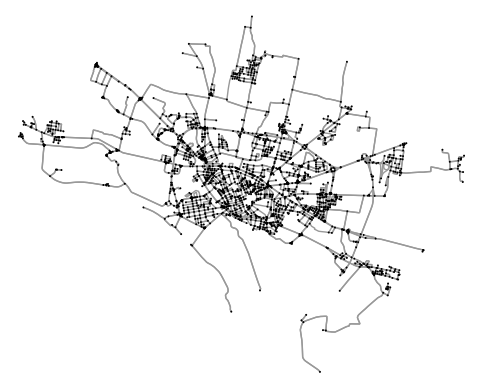

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [3]:
fig, ax = plt.subplots()
ox.plot_graph(prj_G, ax=ax, node_size= 2, node_color='black')

In [4]:
# Compute the basic stats
stats = ox.basic_stats(prj_G)
stats

{'n': 2280,
 'm': 4786,
 'k_avg': 4.198245614035088,
 'edge_length_total': 506531.7928779334,
 'edge_length_avg': 105.8361456075916,
 'streets_per_node_avg': 2.818421052631579,
 'streets_per_node_counts': {0: 0, 1: 299, 2: 20, 3: 1766, 4: 188, 5: 5, 6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.13114035087719297,
  2: 0.008771929824561403,
  3: 0.7745614035087719,
  4: 0.0824561403508772,
  5: 0.0021929824561403508,
  6: 0.0008771929824561404},
 'intersection_count': 1981,
 'street_length_total': 311711.10041396465,
 'street_segment_count': 3197,
 'street_length_avg': 97.50112618516255,
 'circuity_avg': 1.0552624516232032,
 'self_loop_proportion': 0.0015639662183296842}

(0.0, 1.0)

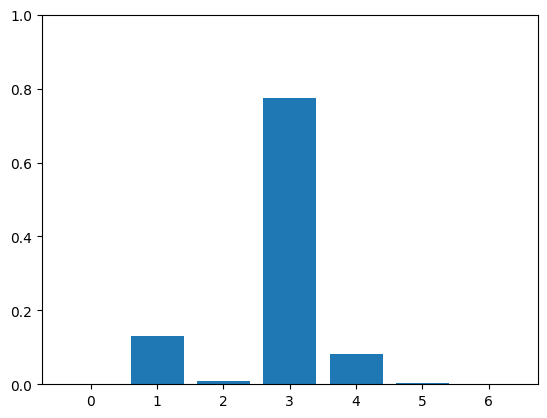

In [5]:
# Plot degree distribution
cat = stats['streets_per_node_proportions'].keys()
freq = stats['streets_per_node_proportions'].values()

plt.bar(cat,freq)
plt.ylim(0,1)



In [6]:
# Let's create a GeoDataFrame from the graph
gdf_nodes, gdf_edges = ox.graph_to_gdfs(prj_G)
gdf_nodes.head()

y              x  street_count highway junction  \
osmid                                                                   
249617125  5.000033e+06  578681.931488             3     NaN      NaN   
302402633  4.999980e+06  578679.421611             3     NaN      NaN   
249617128  4.999968e+06  578742.690104             3     NaN      NaN   
302402587  4.999994e+06  578765.527141             3     NaN      NaN   
302415503  4.999956e+06  578784.130629             3     NaN      NaN   

                         geometry  
osmid                              
249617125  POINT (5.79e+05 5e+06)  
302402633  POINT (5.79e+05 5e+06)  
249617128  POINT (5.79e+05 5e+06)  
302402587  POINT (5.79e+05 5e+06)  
302415503  POINT (5.79e+05 5e+06)

In [7]:
gdf_nodes.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
# Select specific nodes with lat and lon
lat, lon = 45.139614, 10.026505
start_point = shapely.geometry.Point(lon, lat)
start_point_gdf = gpd.GeoDataFrame(geometry=[start_point], crs= "EPSG:4326")
start_point_gdf = start_point_gdf.to_crs(gdf_nodes.crs)
print(start_point_gdf.geometry.x[0], start_point_gdf.geometry.y[0])
start = ox.distance.nearest_nodes(prj_G, start_point_gdf.geometry.x[0], start_point_gdf.geometry.y[0])
print(start)

580707.5607852439 4998972.427854139
282576292


In [9]:
gdf_nodes.loc[start]

y                                            4999002.789858
x                                             580717.759562
street_count                                              3
highway                                                 NaN
junction                                                NaN
geometry        POINT (580717.7595624436 4999002.789858477)
Name: 282576292, dtype: object

In [10]:
# find the gdf_node corresponding to the start node
start_node = gdf_nodes.loc[start]

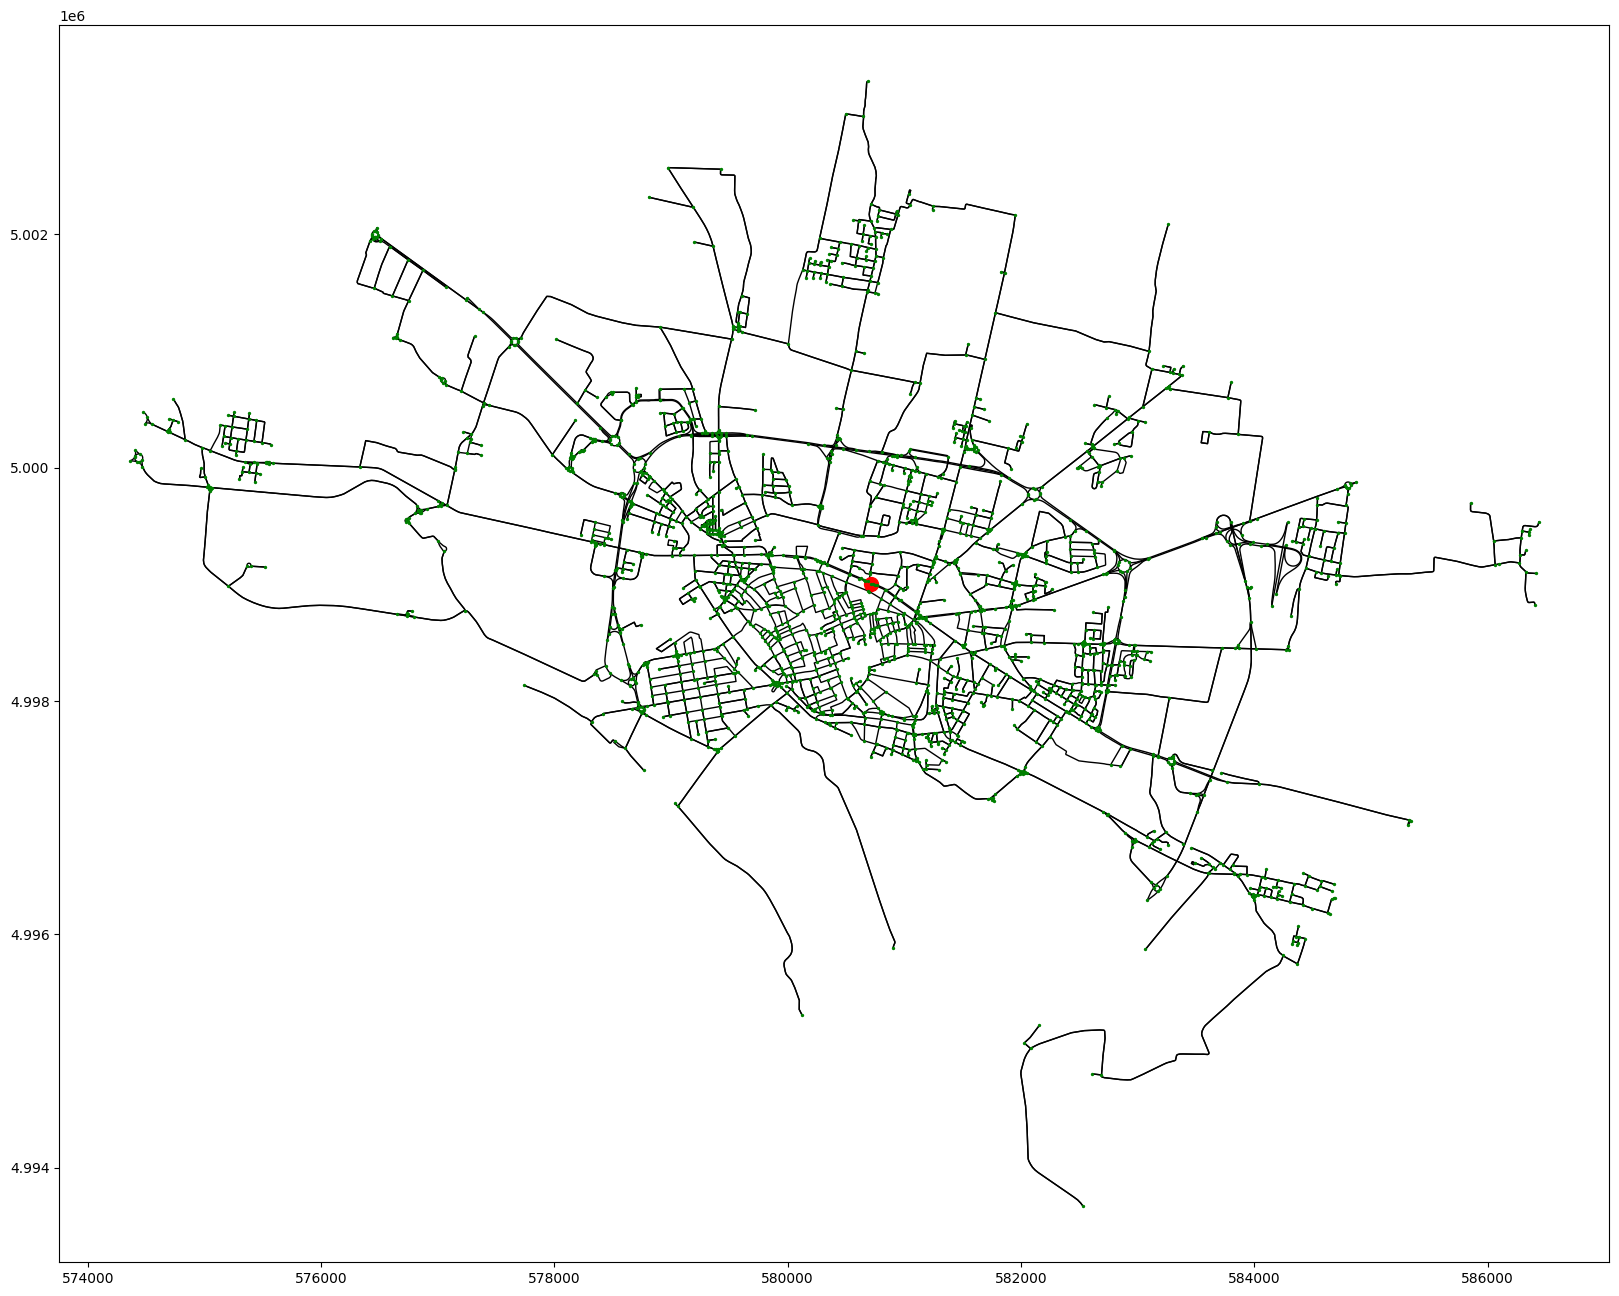

In [12]:
#Highlighting the start node by plotting nodes and edges and not the original graph
#plot gdb_nodes and gdf_edges
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=100)

In [13]:
arrive_lat, arrive_lon = 45.12868, 10.00280
arrive_point = shapely.geometry.Point(arrive_lon, arrive_lat)
arrive_point_gdf = gpd.GeoDataFrame(geometry=[arrive_point], crs= "EPSG:4326")
arrive_point_gdf = arrive_point_gdf.to_crs(gdf_nodes.crs)
print(arrive_point_gdf.geometry.x[0], arrive_point_gdf.geometry.y[0])
arrive = ox.distance.nearest_nodes(prj_G, arrive_point_gdf.geometry.x[0], arrive_point_gdf.geometry.y[0])

arrive_node = gdf_nodes.loc[arrive]

578858.8571763304 4997734.373224317


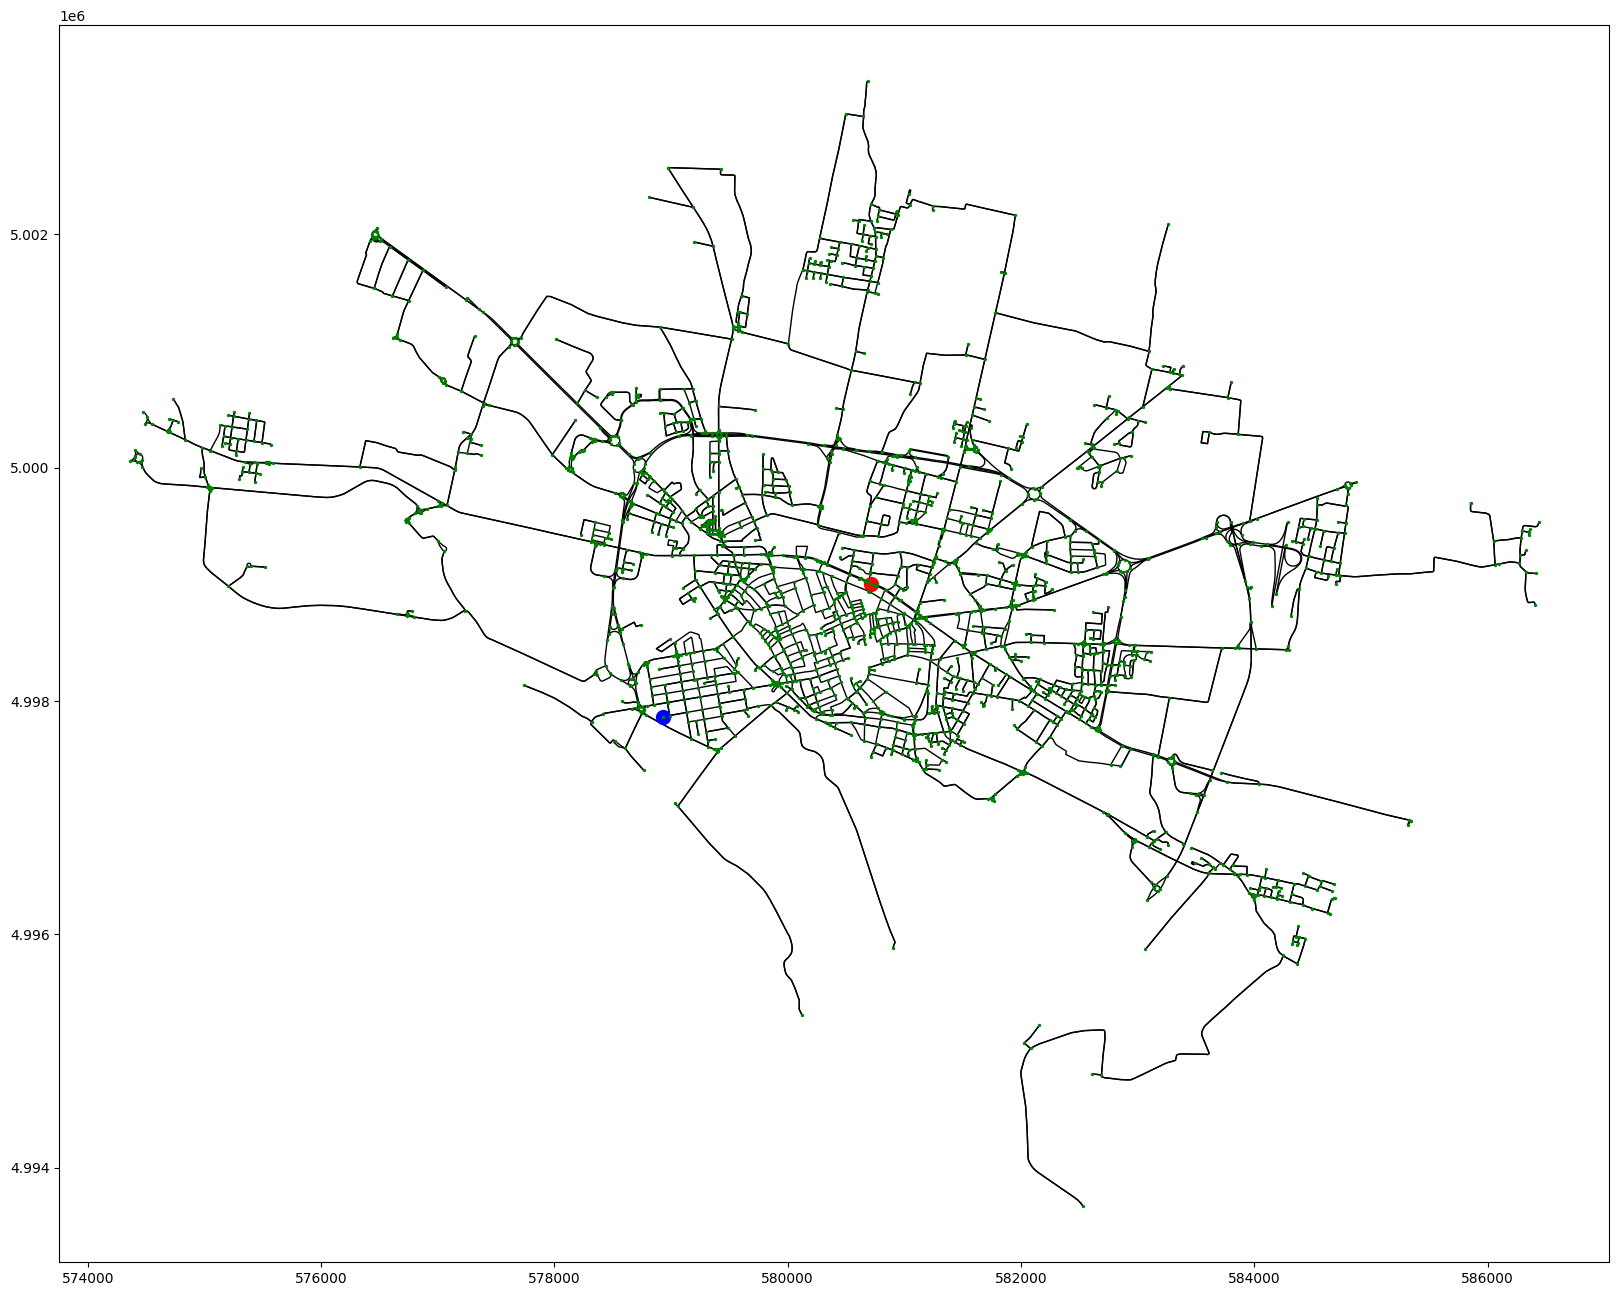

In [15]:
# Plotssss
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=100)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='blue', s=100)


Took me 2 hours to paint red and blue dots on a map. not proud of this.
### Shortest path

In [16]:
gdf_edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
302402633 332198526 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          853019208 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
249617128 302402587 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          302415503 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   

                        maxspeed bridge tunnel width access  
u         v         key                                      
249617125 302402633 0        NaN    NaN    NaN   NaN    NaN  
302402633 332198526 0        NaN    NaN    NaN   NaN    NaN  
          853019208 0        NaN    NaN    NaN   NaN    NaN  
249617128 302402587 0        NaN    NaN    NaN   NaN    NaN  
          302415503 0        NaN    NaN    NaN   NaN    NaN

In [18]:
# Let's find the shortest path
route = nx.shortest_path(prj_G, start, arrive, weight='length')
route_edges = list(zip(route, route[1:]))

print(route_edges)
ec = ['r' if edge in route_edges else 'blue' for edge in prj_G.edges()]
es = [3 if edge in route_edges else 1 for edge in prj_G.edges()]
#print(ec)

[(282576292, 2836081292), (2836081292, 5429146382), (5429146382, 5429146388), (5429146388, 852939665), (852939665, 5433301884), (5433301884, 5433301907), (5433301907, 852939317), (852939317, 852939623), (852939623, 852939426), (852939426, 852939357), (852939357, 852939670), (852939670, 6405157903), (6405157903, 852939918), (852939918, 662426884), (662426884, 662426885), (662426885, 2369346412), (2369346412, 2369346408), (2369346408, 852939793), (852939793, 866467818), (866467818, 5612343987), (5612343987, 852912354), (852912354, 9313008596), (9313008596, 852912775), (852912775, 852912500), (852912500, 852912699), (852912699, 852911797), (852911797, 4688794686), (4688794686, 852912529), (852912529, 852912181), (852912181, 252474598), (252474598, 252474599), (252474599, 852911808), (852911808, 297653762), (297653762, 1498947458), (1498947458, 297653754), (297653754, 852975942), (852975942, 297653717), (297653717, 852939431), (852939431, 423358833), (423358833, 2250040998), (2250040998, 4

The length of the route is:  2865 m


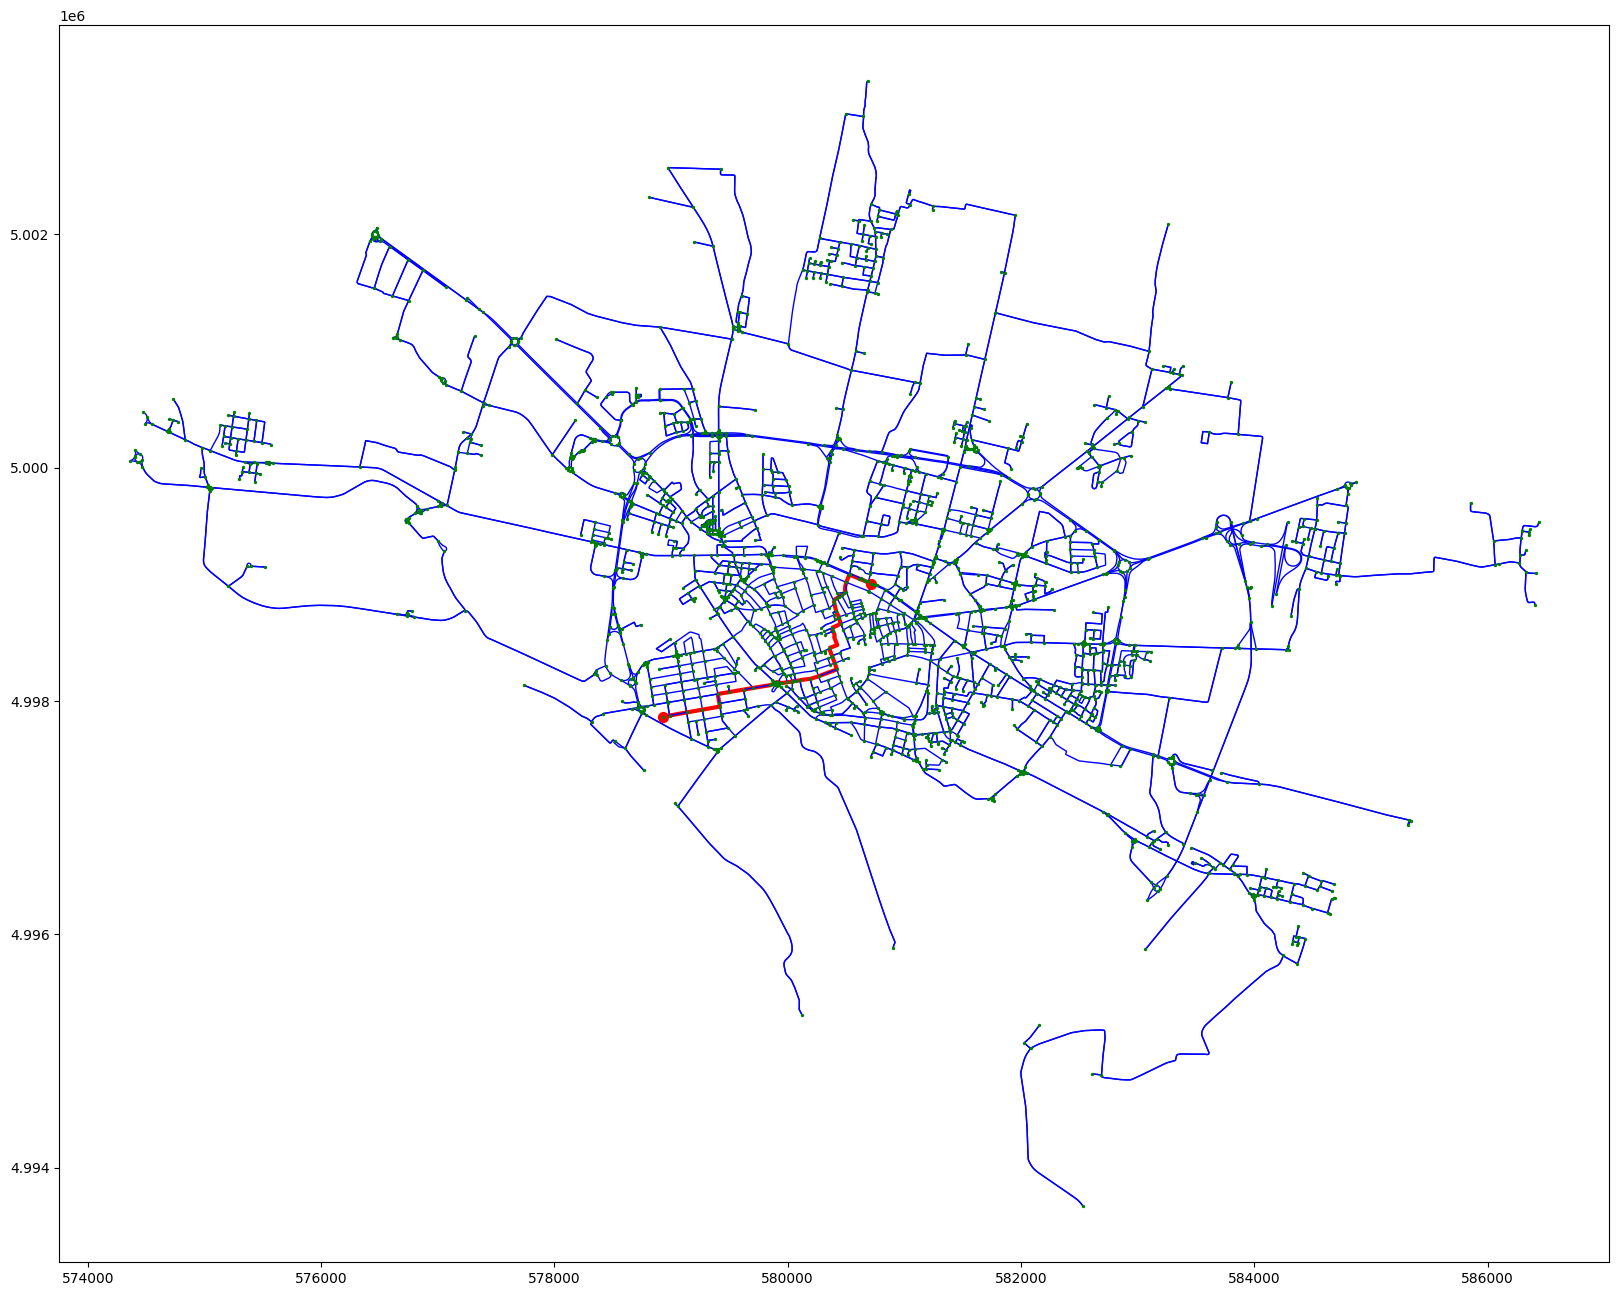

In [20]:

#plot
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=es, edgecolor= ec, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)
#plot the route

# Length of the route
routegdf = ox.routing.route_to_gdf(prj_G, route, weight='length')
lenght = int(routegdf['length'].sum())
print("The length of the route is: ", lenght, "m")


In [21]:
# Convert the route to CRS 4326
routegdf = routegdf.to_crs("EPSG:4326")

In [22]:
# export 
routegdf.to_file("route.geojson", driver='GeoJSON')

Everything looks good, of course some roads are not drivable due to traffic restrictions, but the route is correct.

In [23]:
# Let's use time as weight, and find the shortest path, we need to insert the speed of the roads
prj_G_speed = ox.add_edge_speeds(prj_G)
prj_G_speed = ox.add_edge_travel_times(prj_G_speed)

In [24]:
edges = ox.graph_to_gdfs(prj_G_speed, nodes=False, edges=True)
edges['highway'] = edges['highway'].astype(str)
edges.groupby("highway")[["length", "speed_kph", "travel_time"]].mean().round(1)

length  speed_kph  travel_time
highway                                                        
['secondary', 'secondary_link']    25.3       51.0          1.8
['tertiary', 'unclassified']      186.6       47.8         14.1
['unclassified', 'residential']   214.5       37.8         20.4
['unclassified', 'tertiary']      186.6       37.8         17.8
living_street                      75.8       58.4          4.7
motorway                          578.4      130.0         16.0
motorway_link                     302.9       40.0         27.3
primary                           146.7       58.4          8.9
primary_link                       96.1       55.0          6.4
residential                        82.4       36.5          8.2
secondary                          99.6       51.0          6.9
secondary_link                    129.0       58.4          7.9
tertiary                          112.1       47.8          8.5
tertiary_link                      50.0       58.4          3.1
trunk                             337.3       67.9         18.0
trunk_link                        117.7       60.0          7.1
unclassified                      245.3       37.8         23.3

In [25]:
edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
302402633 332198526 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          853019208 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
249617128 302402587 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          302415503 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   

                         speed_kph  travel_time maxspeed bridge tunnel width  \
u         v         key                                                        
249617125 302402633 0    58.410596     3.299485      NaN    NaN    NaN   NaN   
302402633 332198526 0    58.410596     4.161102      NaN    NaN    NaN   NaN   
          853019208 0    58.410596     7.293122      NaN    NaN    NaN   NaN   
249617128 302402587 0    58.410596     2.146599      NaN    NaN    NaN   NaN   
          302415503 0    51.029412     3.089139      NaN    NaN    NaN   NaN   

                        access  
u         v         key         
249617125 302402633 0      NaN  
302402633 332198526 0      NaN  
          853019208 0      NaN  
249617128 302402587 0      NaN  
          302415503 0      NaN

In [26]:
# Let's find the shortest path
route2 = nx.shortest_path(prj_G_speed, start, arrive, weight='travel_time')
route_edges2 = list(zip(route2, route2[1:]))

ec2 = ['r' if edge in route_edges2 else 'blue' for edge in prj_G_speed.edges()]
es2 = [3 if edge in route_edges2 else 1 for edge in prj_G_speed.edges()]

The length of the route is:  2885 m


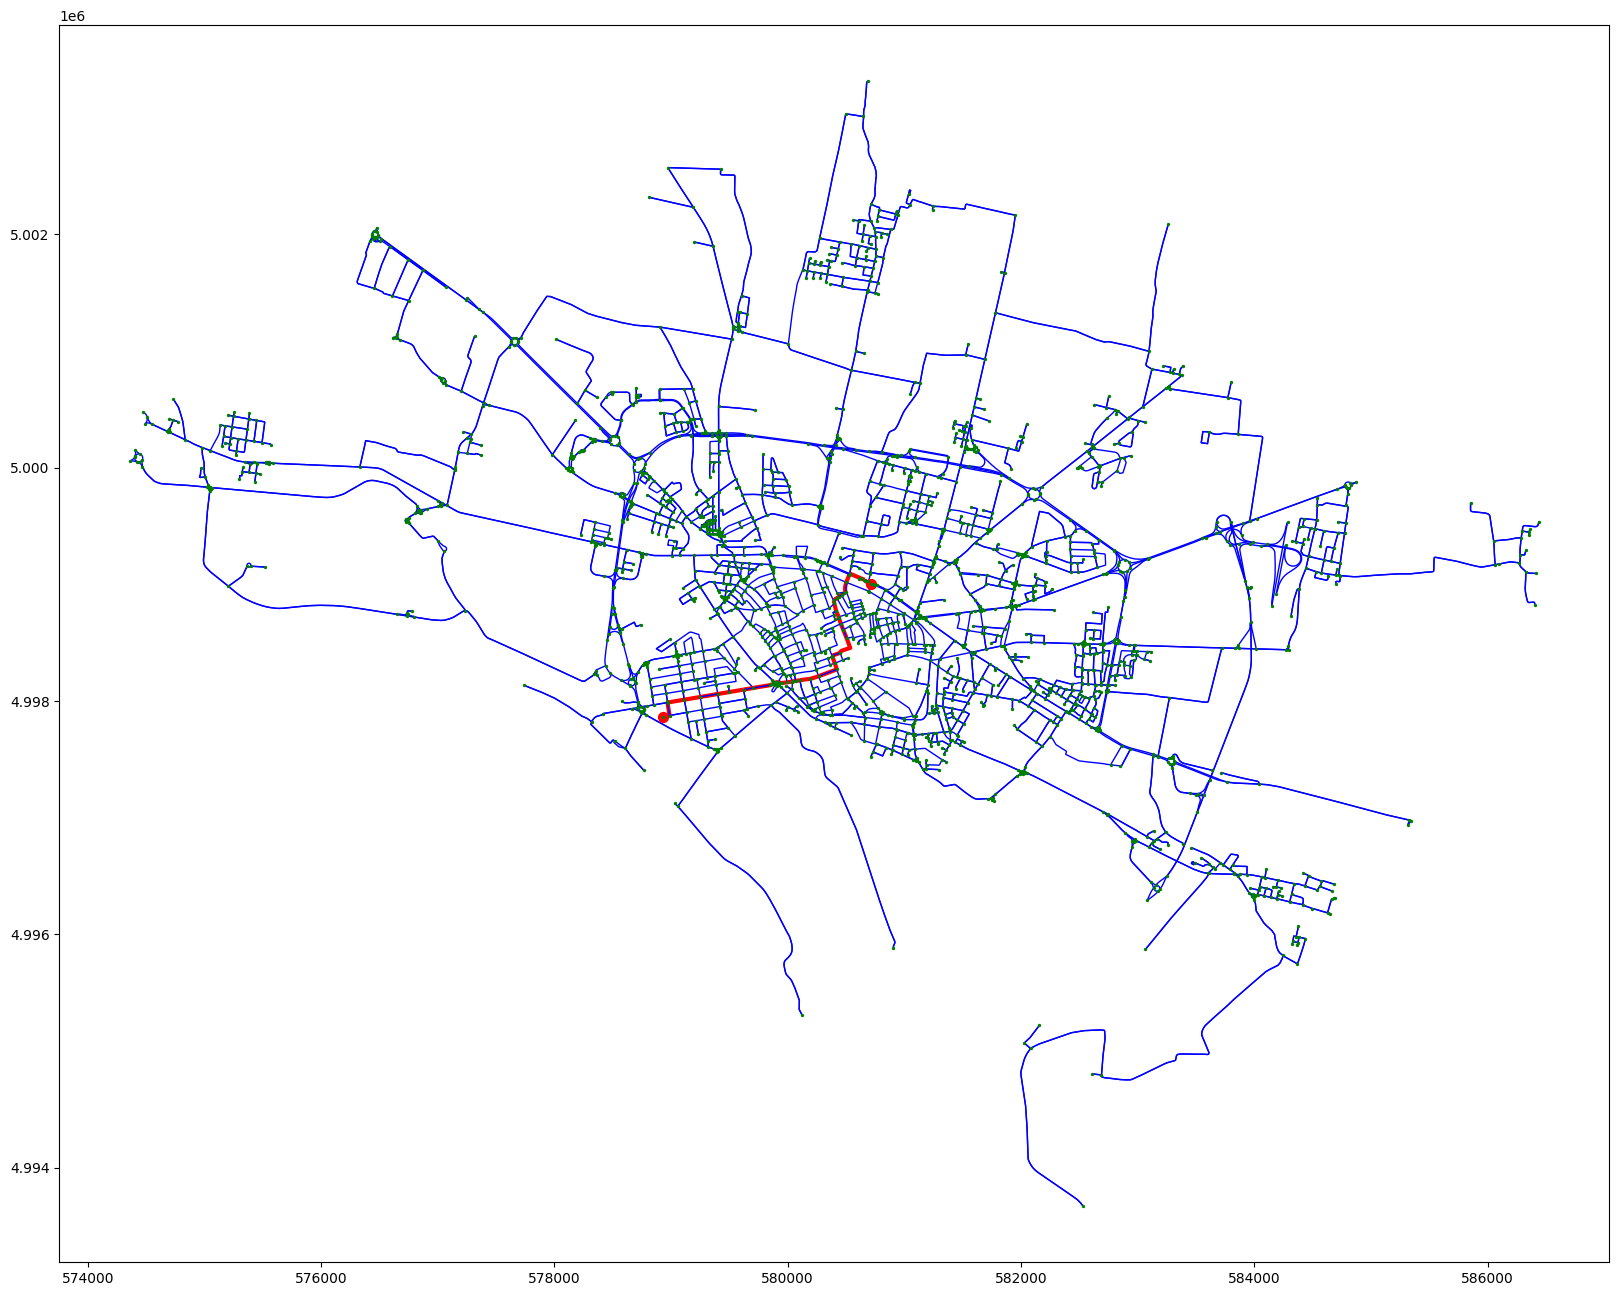

In [27]:
#plot
fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=es2, edgecolor= ec2, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)

# Length of the route
routegdf2 = ox.routing.route_to_gdf(prj_G_speed, route2, weight='travel_time')
lenght2 = int(routegdf2['length'].sum())

print("The length of the route is: ", lenght2, "m")

In [28]:
# Compute the time of the route for both cases
routegdf = ox.routing.route_to_gdf(prj_G_speed, route, weight='length')

time1 = int(routegdf['travel_time'].sum())
time2 = int(routegdf2['travel_time'].sum())

print("The time of the route 1 is: ", time1, "s")
print("The time of the route 2 is: ", time2, "s")

The time of the route 1 is:  280 s
The time of the route 2 is:  260 s


In [29]:
# Convert the route to CRS 4326
routegdf2 = routegdf2.to_crs("EPSG:4326")
# export the route to GeoJSON
routegdf2.to_file("route2.geojson", driver='GeoJSON')


Everything looks very good, let's try to adjust to how traffic is in Cremona, and see if we can get a better route.


In [30]:
# Traffic, very naive approach: use inbetween centrality to simulate traffic
bc = nx.betweenness_centrality(prj_G_speed, weight='length')
edge_bc = nx.edge_betweenness_centrality(prj_G_speed, weight='length')


In [87]:
nx.set_node_attributes(prj_G_speed, bc, 'bc')
nx.set_edge_attributes(prj_G_speed, edge_bc, 'edge_bc')

gdf_nodes = ox.graph_to_gdfs(prj_G_speed, edges=False)
gdf_edges = ox.graph_to_gdfs(prj_G_speed, nodes=False, edges=True)


In [88]:
gdf_nodes.head()

y              x  street_count        bc highway  \
osmid                                                                    
249617125  5.000033e+06  578681.931488             3  0.034918     NaN   
302402633  4.999980e+06  578679.421611             3  0.034921     NaN   
249617128  4.999968e+06  578742.690104             3  0.036485     NaN   
302402587  4.999994e+06  578765.527141             3  0.038895     NaN   
302415503  4.999956e+06  578784.130629             3  0.045539     NaN   

          junction                geometry  
osmid                                       
249617125      NaN  POINT (5.79e+05 5e+06)  
302402633      NaN  POINT (5.79e+05 5e+06)  
249617128      NaN  POINT (5.79e+05 5e+06)  
302402587      NaN  POINT (5.79e+05 5e+06)  
302415503      NaN  POINT (5.79e+05 5e+06)

<Axes: >

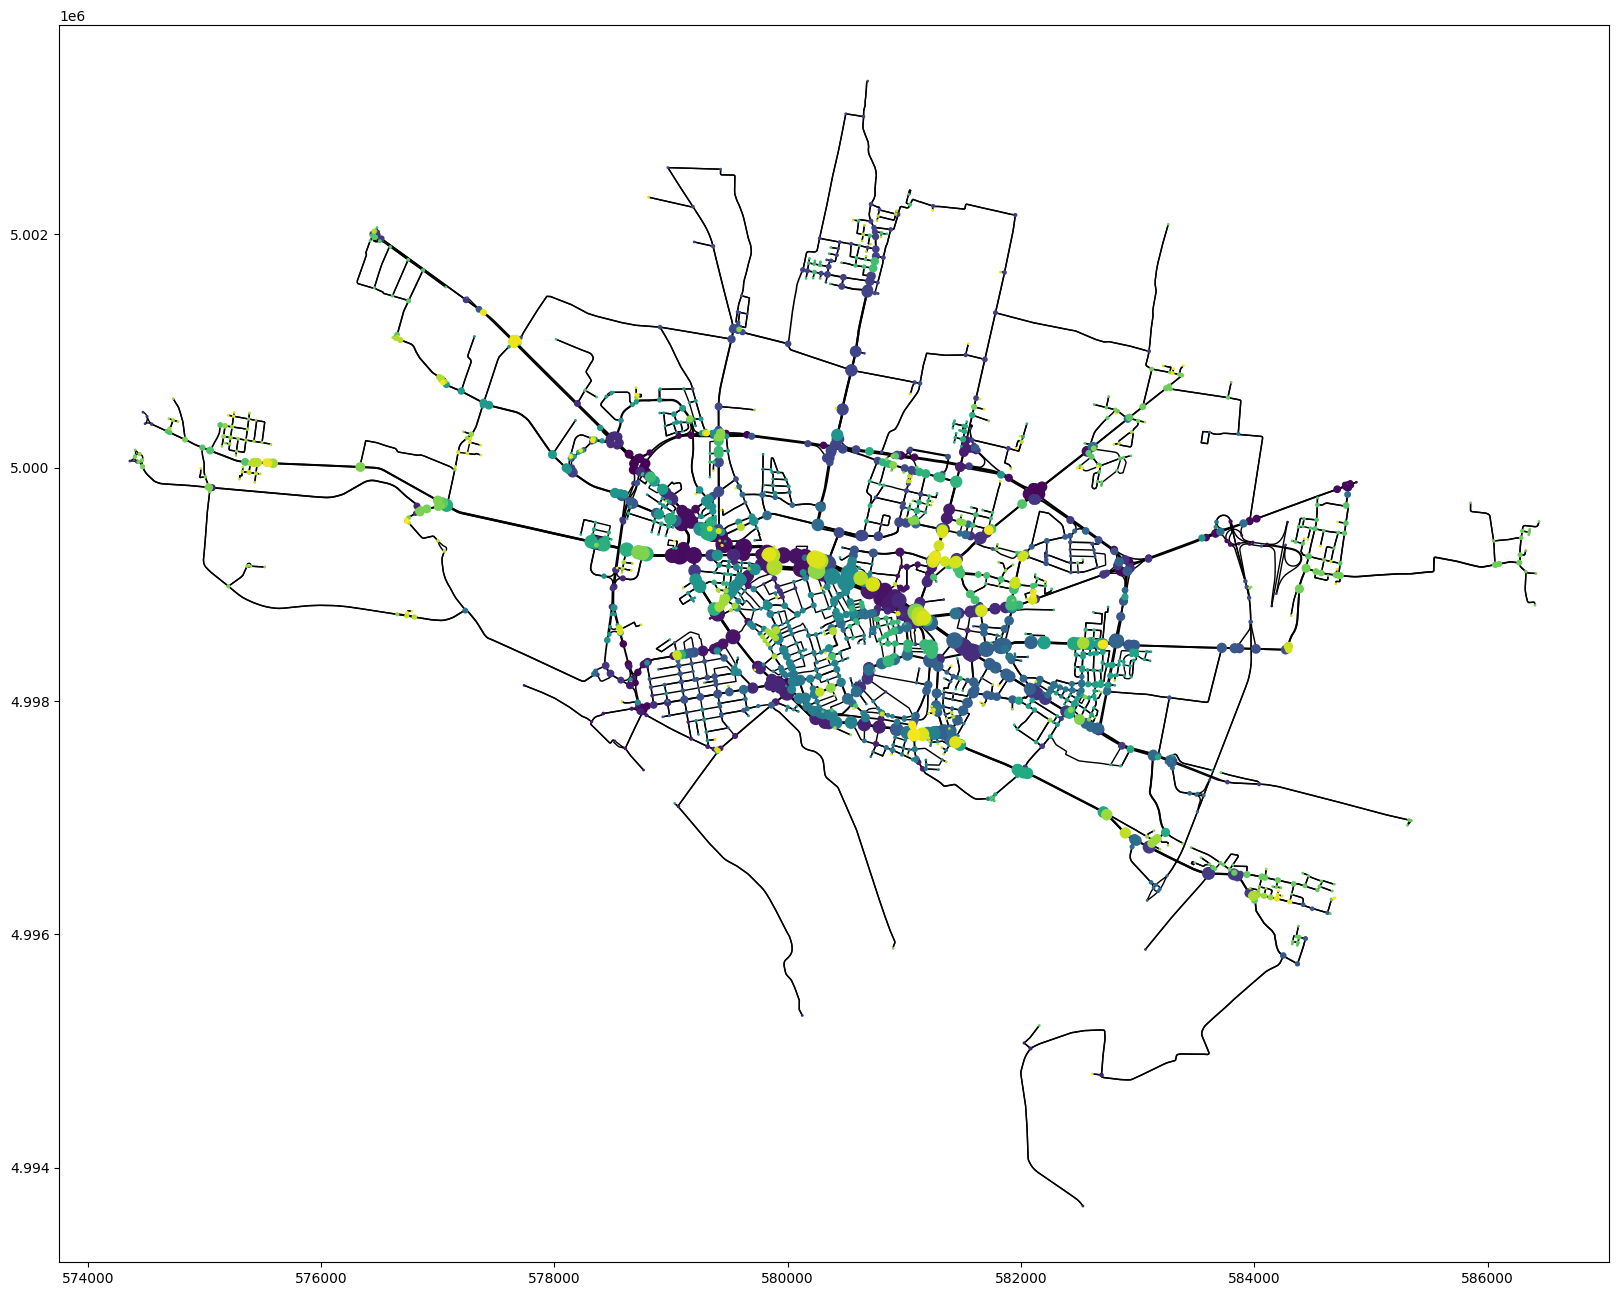

In [89]:
#  centrality
nc = gdf_nodes['bc']
ns = 1+ gdf_nodes['bc']*1000

ec = gdf_edges['edge_bc']
es = 1+ gdf_edges['edge_bc']*20

fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, c = nc, zorder=2, markersize= ns, cmap='viridis')
gdf_edges.plot(ax=ax, linewidth= es, zorder=1, cmap='viridis', edgecolor='black')



In [90]:
# I can use bc to influence the speed of the roads
max = gdf_edges['edge_bc'].max()
min = gdf_edges['edge_bc'].min()

gdf_edges['edge_bc'] = (gdf_edges['edge_bc'] - min)/(max - min)
print(gdf_edges['edge_bc'].max(), gdf_edges['edge_bc'].min())

1.0 0.0


In [91]:
gdf_edges['speed_kph'].head()

u          v          key
249617125  302402633  0      58.410596
302402633  332198526  0      58.410596
           853019208  0      58.410596
249617128  302402587  0      58.410596
           302415503  0      51.029412
Name: speed_kph, dtype: float64

In [92]:
# speed of the roads using edge_bc
gdf_edges['traffic_speed'] = gdf_edges['speed_kph']*(1-gdf_edges['edge_bc']*0.7)
# compute time (in seconds) to travel each edge
gdf_edges['traffic_time'] = gdf_edges['length'] / (gdf_edges['traffic_speed'] * 1000 / 3600)
prj_G_traffic = ox.graph_from_gdfs(gdf_nodes, gdf_edges)


In [93]:
gdf_edges.head()

osmid    highway    junction lanes  \
u         v         key                                          
249617125 302402633 0    27547575    primary  roundabout     2   
302402633 332198526 0    27547575    primary  roundabout     2   
          853019208 0    27706271    primary         NaN     2   
249617128 302402587 0    27547575    primary  roundabout     2   
          302415503 0    27548810  secondary         NaN   NaN   

                                    name       ref  oneway reversed  \
u         v         key                                               
249617125 302402633 0      Via Seminario  SPexSS10    True    False   
302402633 332198526 0      Via Seminario  SPexSS10    True    False   
          853019208 0      Via Seminario  SPexSS10    True    False   
249617128 302402587 0      Via Seminario  SPexSS10    True    False   
          302415503 0    Via Castelleone       NaN    True    False   

                             length  \
u         v         key               
249617125 302402633 0     53.534697   
302402633 332198526 0     67.514562   
          853019208 0    118.332108   
249617128 302402587 0     34.828924   
          302415503 0     43.788035   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
302402633 332198526 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          853019208 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
249617128 302402587 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          302415503 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   

                         speed_kph  travel_time   edge_bc maxspeed bridge  \
u         v         key                                                     
249617125 302402633 0    58.410596     3.299485  0.257884      NaN    NaN   
302402633 332198526 0    58.410596     4.161102  0.197348      NaN    NaN   
          853019208 0    58.410596     7.293122  0.060564      NaN    NaN   
249617128 302402587 0    58.410596     2.146599  0.111161      NaN    NaN   
          302415503 0    51.029412     3.089139  0.158156      NaN    NaN   

                        tunnel width access  traffic_speed  traffic_time  
u         v         key                                                   
249617125 302402633 0      NaN   NaN    NaN      47.866378      4.026311  
302402633 332198526 0      NaN   NaN    NaN      50.341538      4.828069  
          853019208 0      NaN   NaN    NaN      55.934287      7.616001  
249617128 302402587 0      NaN   NaN    NaN      53.865507      2.327726  
          302415503 0      NaN   NaN    NaN      45.380000      3.473709

In [94]:
# shortest path
route_traffic = nx.shortest_path(prj_G_traffic, start, arrive, weight='traffic_time')
route_edges_traffic = list(zip(route_traffic, route_traffic[1:]))

ec_traffic = ['r' if edge in route_edges_traffic else 'blue' for edge in prj_G_traffic.edges()]
es_traffic = [3 if edge in route_edges_traffic else 1 for edge in prj_G_traffic.edges()]

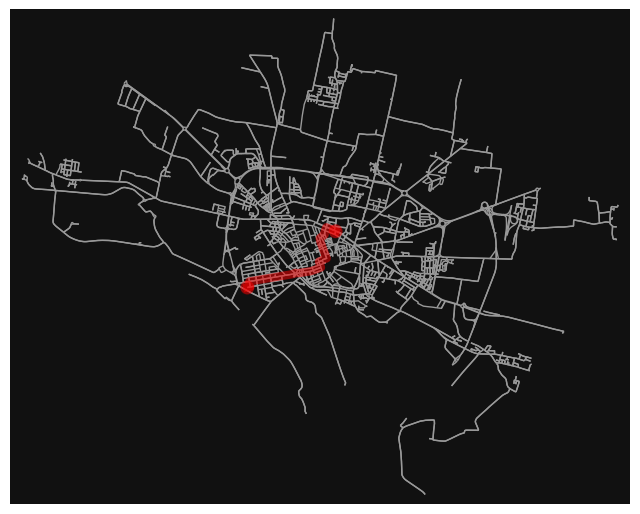

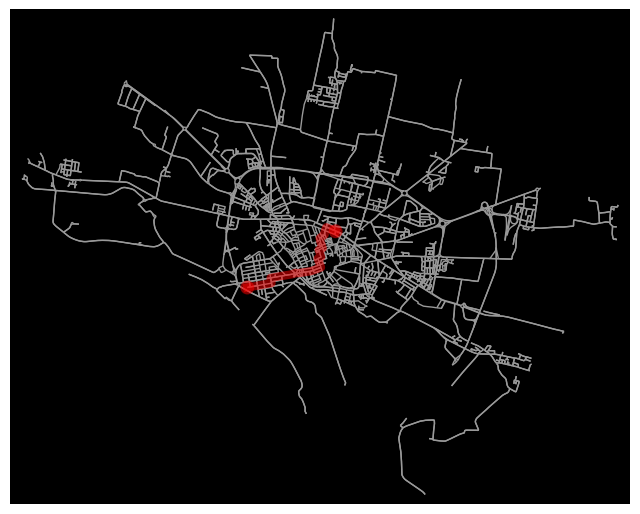

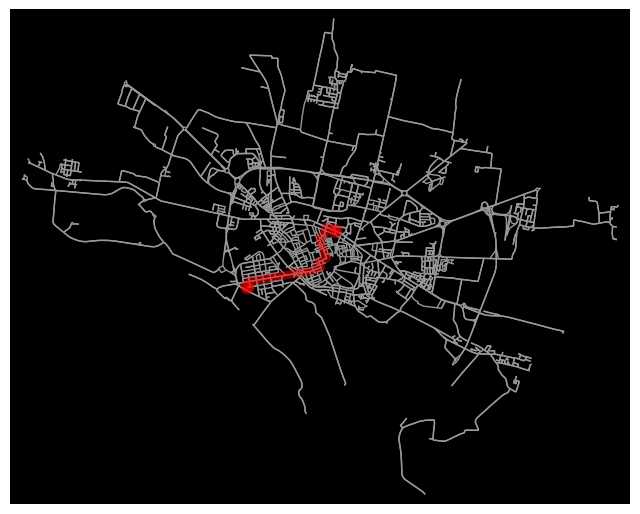

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [95]:
ox.plot_graph_route(prj_G, route_traffic, route_linewidth=6, node_size=0)
ox.plot_graph_route(prj_G, route, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')
ox.plot_graph_route(prj_G, route2, route_linewidth=6, node_size=0, bgcolor='k', route_color='r')

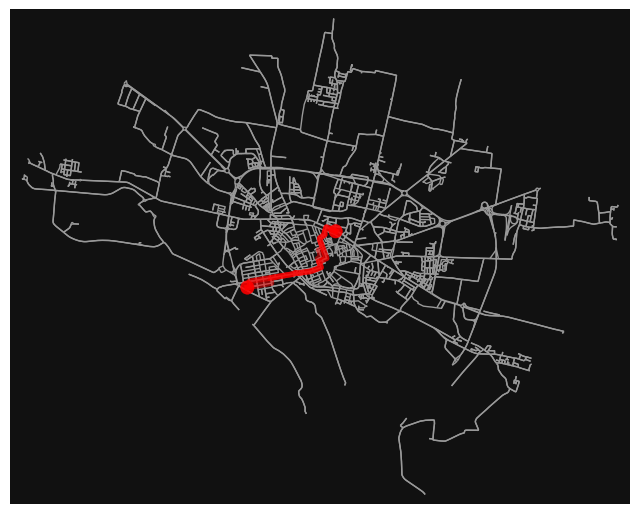

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [96]:
#plot all routes
all_routes = [route, route2, route_traffic]
ox.plot_graph_routes(prj_G_traffic, all_routes, route_color='r', route_linewidth=6, node_size=0)


In [97]:
# Length of the route
routegdf_traffic = ox.routing.route_to_gdf(prj_G_traffic, route_traffic, weight='length')
lenght_traffic = int(routegdf_traffic['length'].sum())
print("The length of the route is: ", lenght_traffic, "m")


The length of the route is:  2874 m


In [98]:
# time of the route
time_traffic = int(routegdf_traffic['traffic_time'].sum())
print("The time of the route is: ", time_traffic, "s")

The time of the route is:  288 s


In [99]:
#export the route to GeoJSON
routegdf_traffic = routegdf_traffic.to_crs("EPSG:4326")
routegdf_traffic.to_file("route_traffic.geojson", driver='GeoJSON')

Looks like the **traffic** is not changing the route, time still has increased soooo I guess it is fine


### Let's add traffic lights


In [100]:
# search for traffic lights
traffic_lights = ox.features_from_place(place_name, tags={'highway':'traffic_signals'}, which_result=2)

In [101]:
traffic_lights.head()

geometry          highway crossing  \
element id                                                           
node    282022293  POINT (10.007 45.145)  traffic_signals      NaN   
        282024136  POINT (10.019 45.142)  traffic_signals      NaN   
        282024199  POINT (10.016 45.142)  traffic_signals      NaN   
        282024430  POINT (10.019 45.141)  traffic_signals      NaN   
        282025210  POINT (10.019 45.142)  traffic_signals      NaN   

                  traffic_signals traffic_signals:direction crossing_ref  \
element id                                                                 
node    282022293             NaN                       NaN          NaN   
        282024136             NaN                       NaN          NaN   
        282024199             NaN                       NaN          NaN   
        282024430             NaN                       NaN          NaN   
        282025210             NaN                       NaN          NaN   

                  bicycle button_operated segregated tactile_paving  
element id                                                           
node    282022293     NaN             NaN        NaN            NaN  
        282024136     NaN             NaN        NaN            NaN  
        282024199     NaN             NaN        NaN            NaN  
        282024430     NaN             NaN        NaN            NaN  
        282025210     NaN             NaN        NaN            NaN

<Axes: >

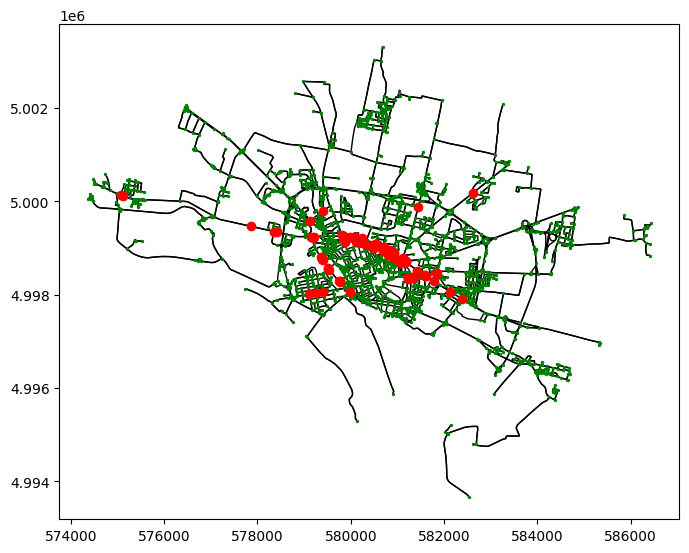

In [102]:
traffic_lights.to_crs(gdf_nodes.crs, inplace=True)
#plot
fig, ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
traffic_lights.plot(ax=ax, color='red', zorder=3)


This looks way more accurate then what I expected, crazy

In [103]:
# Let's add the traffic lights to the nodes
gdf_nodes['traffic_lights'] = False
for index, row in traffic_lights.iterrows():
    nearest_node = ox.distance.nearest_nodes(prj_G, row.geometry.x, row.geometry.y)
    gdf_nodes.loc[nearest_node, 'traffic_lights'] = True


In [104]:
prj_G_traffic_lights = ox.graph_from_gdfs(gdf_nodes, gdf_edges)

# let's create a new edge attribute that says if there is a traffic light in the following node
gdf_edges['traffic_lights'] = False
gdf_edges = gdf_edges.sort_index() # Otherwise, it will raise a warning of performance
for u, v,  data in prj_G_traffic_lights.edges(data=True): # REMEMBER THIS WAY OF INDEXING BECAUSE IT TOOK 2 HOURS
    if gdf_nodes.loc[v, 'traffic_lights']:
        gdf_edges.loc[(u,v), 'traffic_lights'] = True


<Axes: >

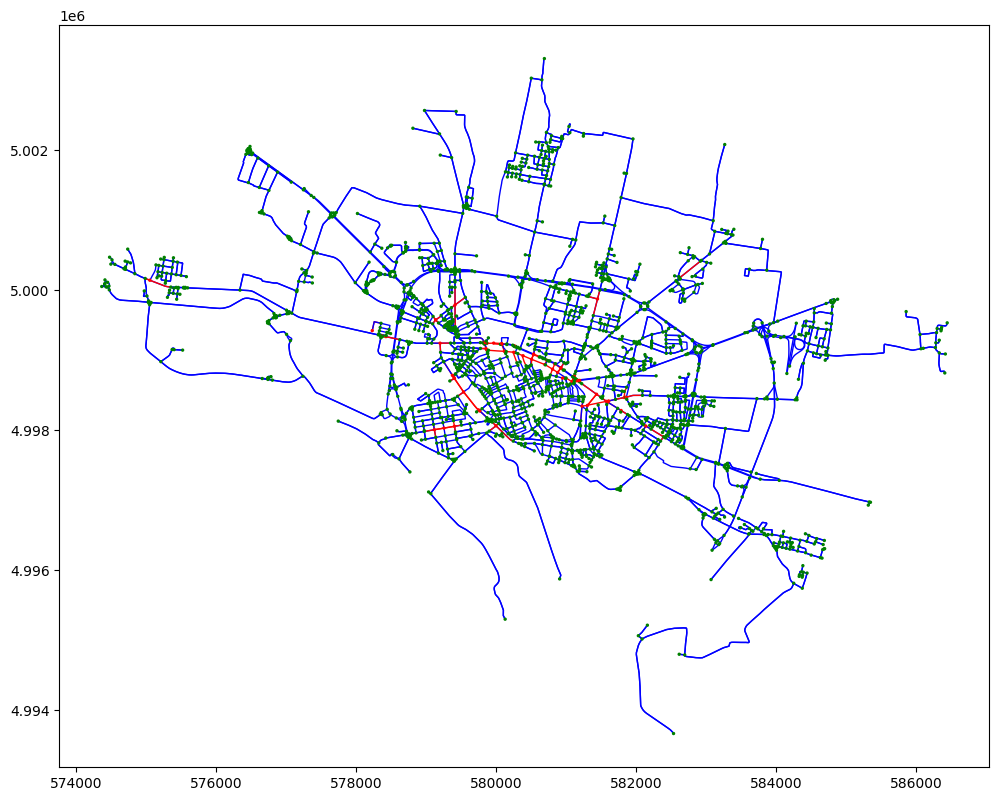

In [105]:
#plot traffic lights
nc = ['red' if node else 'green' for node in gdf_nodes['traffic_lights']]
ec = ['red' if edge else 'blue' for edge in gdf_edges['traffic_lights']]
fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes.plot(ax=ax, color=nc, zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor=ec, zorder=1)


VERY NICE

In [106]:
# Let's add a velocity penalty for traffic lights to the existing traffic
gdf_edges['traffic_speed'] = gdf_edges['speed_kph']*(1-gdf_edges['edge_bc']*0.7)*(1-gdf_edges['traffic_lights']*0.2)
gdf_edges['traffic_time'] = gdf_edges['length'] / (gdf_edges['traffic_speed'] * 1000 / 3600)

gdf_edges.head()

osmid      highway    junction lanes  \
u         v         key                                             
249617125 302402633 0     27547575      primary  roundabout     2   
249617128 302402587 0     27547575      primary  roundabout     2   
          302415503 0     27548810    secondary         NaN   NaN   
252474598 252474599 0     23318066  residential         NaN   NaN   
          852912181 0    483099642  residential         NaN   NaN   

                                               name       ref  oneway  \
u         v         key                                                 
249617125 302402633 0                 Via Seminario  SPexSS10    True   
249617128 302402587 0                 Via Seminario  SPexSS10    True   
          302415503 0               Via Castelleone       NaN    True   
252474598 252474599 0    Corso Vittorio Emanuele II       NaN    True   
          852912181 0    Corso Vittorio Emanuele II       NaN   False   

                        reversed     length  \
u         v         key                       
249617125 302402633 0      False  53.534697   
249617128 302402587 0      False  34.828924   
          302415503 0      False  43.788035   
252474598 252474599 0      False  25.979136   
          852912181 0       True  49.174879   

                                                                  geometry  \
u         v         key                                                      
249617125 302402633 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
249617128 302402587 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
          302415503 0    LINESTRING (5.79e+05 5e+06, 5.79e+05 5e+06, 5....   
252474598 252474599 0    LINESTRING (5.8e+05 5e+06, 5.8e+05 5e+06, 5.8e...   
          852912181 0            LINESTRING (5.8e+05 5e+06, 5.8e+05 5e+06)   

                         ...  travel_time   edge_bc  maxspeed bridge tunnel  \
u         v         key  ...                                                  
249617125 302402633 0    ...     3.299485  0.257884       NaN    NaN    NaN   
249617128 302402587 0    ...     2.146599  0.111161       NaN    NaN    NaN   
          302415503 0    ...     3.089139  0.158156       NaN    NaN    NaN   
252474598 252474599 0    ...     2.564041  0.084193       NaN    NaN    NaN   
          852912181 0    ...     4.853372  0.093275       NaN    NaN    NaN   

                        width access traffic_speed  traffic_time  \
u         v         key                                            
249617125 302402633 0     NaN    NaN     47.866378      4.026311   
249617128 302402587 0     NaN    NaN     53.865507      2.327726   
          302415503 0     NaN    NaN     45.380000      3.473709   
252474598 252474599 0     NaN    NaN     34.325881      2.724617   
          852912181 0     NaN    NaN     34.093992      5.192398   

                         traffic_lights  
u         v         key                  
249617125 302402633 0             False  
249617128 302402587 0             False  
          302415503 0             False  
252474598 252474599 0             False  
          852912181 0             False  

[5 rows x 21 columns]

In [107]:
# shortest path
prj_G_traffic_lights = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
route_traffic_lights = nx.shortest_path(prj_G_traffic_lights, start, arrive, weight='traffic_time')
route_edges_traffic_lights = list(zip(route_traffic_lights, route_traffic_lights[1:]))


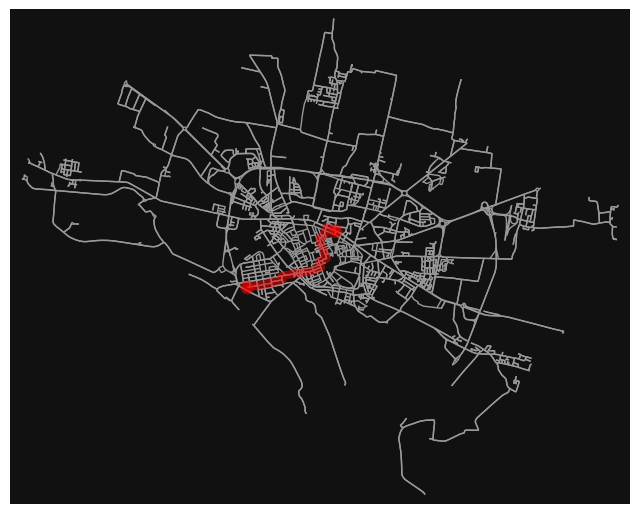

The length of the route is:  2873 m
The time of the route is:  296 s


In [108]:
ox.plot_graph_route(prj_G_traffic_lights, route_traffic_lights, route_linewidth=6, node_size=0)
# Length of the route
routegdf_traffic_lights = ox.routing.route_to_gdf(prj_G_traffic_lights, route_traffic_lights, weight='length')
lenght_traffic_lights = int(routegdf_traffic_lights['length'].sum())
print("The length of the route is: ", lenght_traffic_lights, "m")
time_traffic_lights = int(routegdf_traffic_lights['traffic_time'].sum())
print("The time of the route is: ", time_traffic_lights, "s")


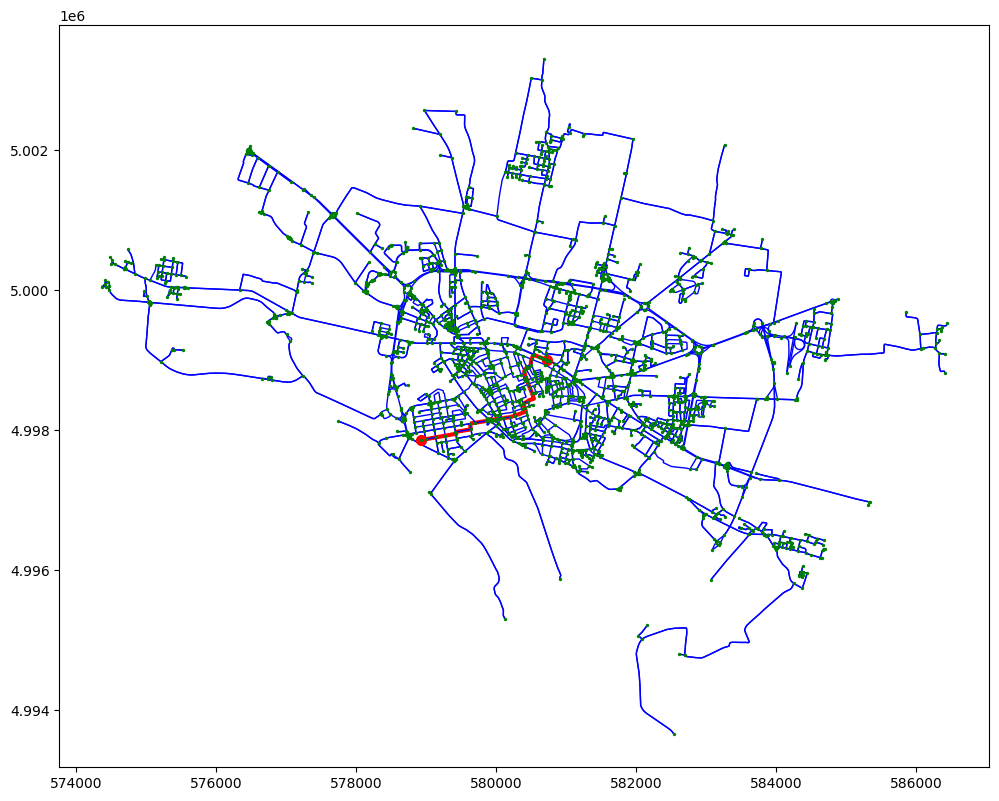

In [109]:
ec_traffic_lights = ['r' if edge in routegdf_traffic_lights.index else 'blue' for edge in gdf_edges.index]
es_traffic_lights = [3 if edge in routegdf_traffic_lights.index else 1 for edge in gdf_edges.index]
#plot
fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=es_traffic_lights, edgecolor= ec_traffic_lights, zorder=1)
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)



In [110]:
#export the route to GeoJSON
routegdf_traffic_lights = routegdf_traffic_lights.to_crs("EPSG:4326")
routegdf_traffic_lights.to_file("route_traffic_lights.geojson", driver='GeoJSON')

Maybe this makes absolutely no sense, but it is funny
### Restricted traffic areas


In [111]:

# let's create a circle around the city center which is a restricted traffic area
center_lat, center_lon = 45.13421, 10.02455
center_point = shapely.geometry.Point(center_lon, center_lat)
center_point_gdf = gpd.GeoDataFrame(geometry=[center_point], crs="EPSG:4326")
center_point_gdf = center_point_gdf.to_crs(gdf_nodes.crs)
# add a buffer of 500 meters
buffer = center_point_gdf.buffer(300)



<Axes: >

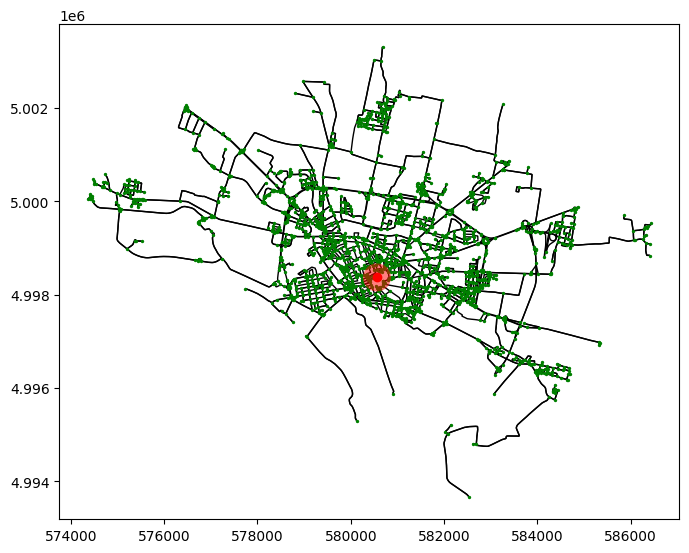

In [112]:
f, ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
center_point_gdf.plot(ax=ax, color='red', zorder=3)
buffer.plot(ax=ax, color='red', alpha=0.5, zorder=3)

Perfect, now the restricted area is the red circle, I have to make it inaccesible

In [113]:
# I want a new graph without the buffer

gdf_nodes_ztl = gdf_nodes[gdf_nodes.apply(lambda x: x.geometry.within(buffer.geometry[0]), axis=1) == False]
gdf_edges_ztl = gdf_edges[gdf_edges.apply(lambda x: x.geometry.within(buffer.geometry[0]), axis=1) == False]
gdf_edges_ztl = gdf_edges_ztl[gdf_edges_ztl.is_valid]

In [114]:
#check for edges with a missing node
u = set(gdf_edges_ztl.index.get_level_values(0))
v = set(gdf_edges_ztl.index.get_level_values(1))
missing_nodes = u.union(v) - set(gdf_nodes_ztl.index)
print(missing_nodes)
#find the edges that miss a node in the beginning or the end
gdf_edges_ztl = gdf_edges_ztl[gdf_edges_ztl.index.get_level_values(0).isin(gdf_nodes_ztl.index) & gdf_edges_ztl.index.get_level_values(1).isin(gdf_nodes_ztl.index)] 

{858116738, 858116612, 858116240, 516123673, 512078491, 3602453148, 303544611, 858116520, 852912043, 858116269, 4125627822, 4125627823, 852912432, 5835885626, 4125370430, 9313008596, 858116695, 1457153111, 852912343, 2369346408, 852939519}


<Axes: >

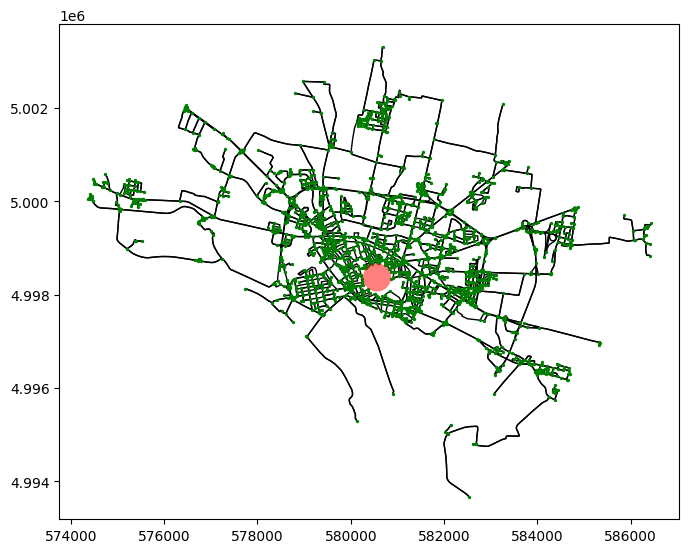

In [115]:
#plot
fig, ax = plt.subplots(1 , 1, figsize=(8,8))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
#center_point_gdf.plot(ax=ax, color='red', zorder=3)
buffer.plot(ax=ax, color='red', alpha=0.5, zorder=3)

In [116]:
# Let's create a new graph
prj_G_ztl = ox.graph_from_gdfs(gdf_nodes_ztl, gdf_edges_ztl )
#route
route_ztl = nx.shortest_path(prj_G_ztl, start, arrive, weight='traffic_time')
routegdf_ztl = ox.routing.route_to_gdf(prj_G_ztl, route_ztl, weight='length')

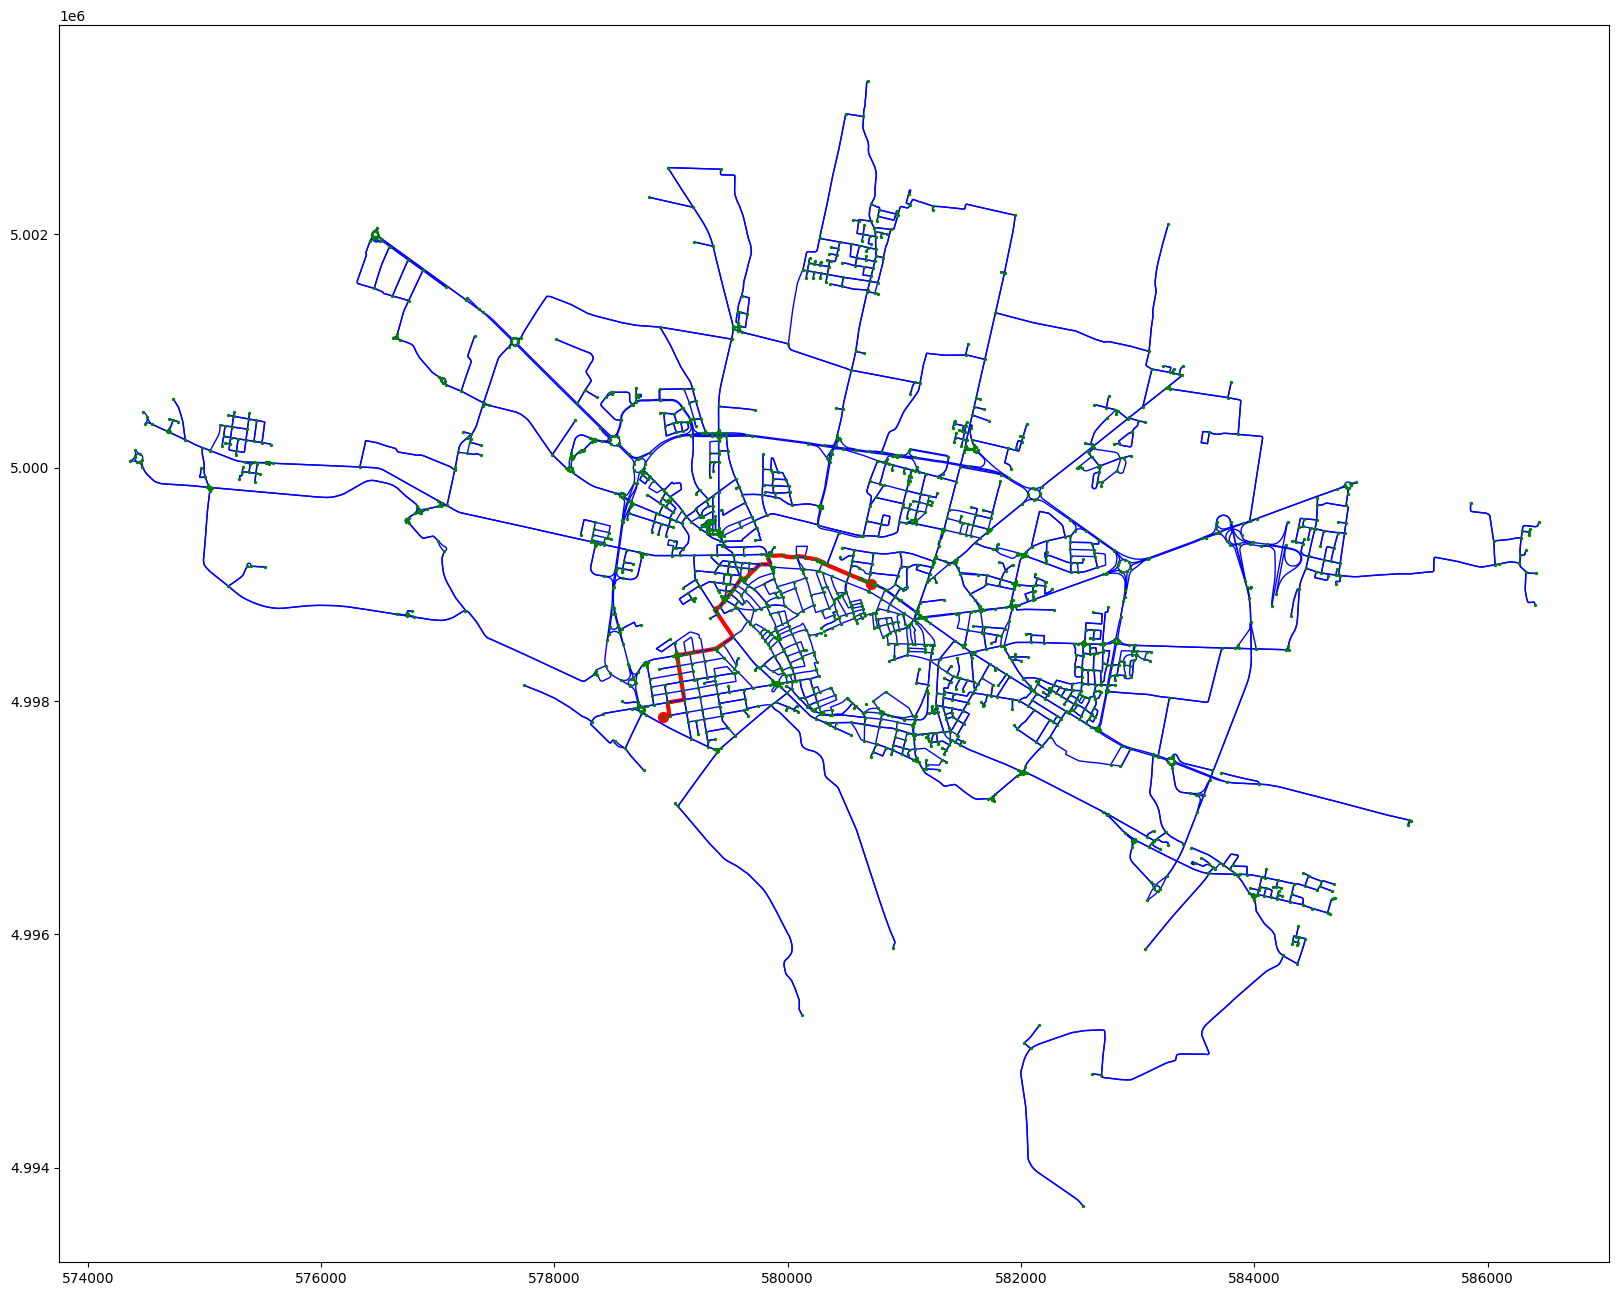

In [117]:
#plot
ec_ztl = ['r' if edge in routegdf_ztl.index else 'blue' for edge in gdf_edges_ztl.index]
es_ztl = [3 if edge in routegdf_ztl.index else 1 for edge in gdf_edges_ztl.index]

fig, ax = plt.subplots(figsize=(20,20))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=es_ztl, edgecolor= ec_ztl, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)

Actually, very solid results!

In [120]:
# Length and time
lenght_ztl = int(routegdf_ztl['length'].sum())
print("The length of the route is: ", lenght_ztl, "m")
time_ztl = int(routegdf_ztl['travel_time'].sum())
print("The time of the route is: ", time_ztl, "s")

The length of the route is:  3244 m
The time of the route is:  312 s


In [121]:
#export 
routegdf_ztl = routegdf_ztl.to_crs("EPSG:4326")
routegdf_ztl.to_file("route_ztl.geojson", driver='GeoJSON')

<Axes: >

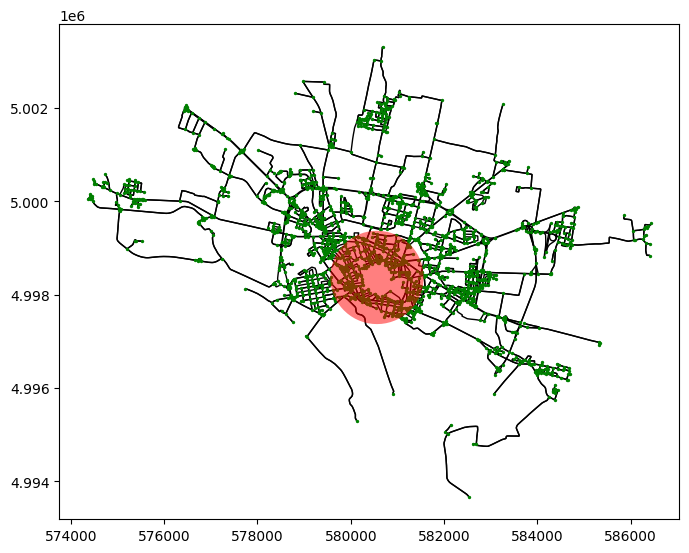

In [122]:
# Let's see if I can increase the traffic of the city center
buffer_traffic = center_point_gdf.buffer(1000)
#plot
fig, ax = plt.subplots(figsize=(8,8))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
buffer_traffic.plot(ax=ax, color='red', alpha=0.5, zorder=3)

In [123]:
gdf_edges.apply(lambda x: x.geometry.within(buffer_traffic.geometry[0]), axis=1)

u            v            key
249617125    302402633    0      False
249617128    302402587    0      False
             302415503    0      False
252474598    252474599    0       True
             852912181    0       True
                                 ...  
12327744866  1189445186   0      False
             12327744870  0      False
12327744870  1189445186   0      False
             1233429749   0      False
             12327744866  0      False
Length: 4786, dtype: bool

In [124]:
# create a new column in the edges that says if the edge is in the buffer_traffic
gdf_edges_ztl['traffic_center'] = False
gdf_edges_ztl = gdf_edges_ztl.sort_index()

gdf_edges_ztl['traffic_center'] = gdf_edges_ztl.apply(lambda x: x.geometry.within(buffer_traffic.geometry[0]), axis=1)

gdf_edges_ztl['traffic_center'].sum()

856

In [140]:
# Let's add a velocity penalty for traffic lights to the existing traffic
gdf_edges_ztl['traffic_speed'] = gdf_edges_ztl['speed_kph']*(1-gdf_edges_ztl['edge_bc']*0.7)*(1-gdf_edges_ztl['traffic_lights']*0.2)*(1-gdf_edges_ztl['traffic_center']*0.2)
gdf_edges_ztl['traffic_time'] = gdf_edges_ztl['length'] / (gdf_edges_ztl['traffic_speed'] * 1000 / 3600)

In [141]:
# shortest path
prj_G_ztl_traffic = ox.graph_from_gdfs(gdf_nodes_ztl, gdf_edges_ztl)
route_ztl_traffic = nx.shortest_path(prj_G_ztl_traffic, start, arrive, weight='traffic_time')
routegdf_ztl = ox.routing.route_to_gdf(prj_G_ztl_traffic, route_ztl_traffic, weight='length')

The time of the route is:  427 s


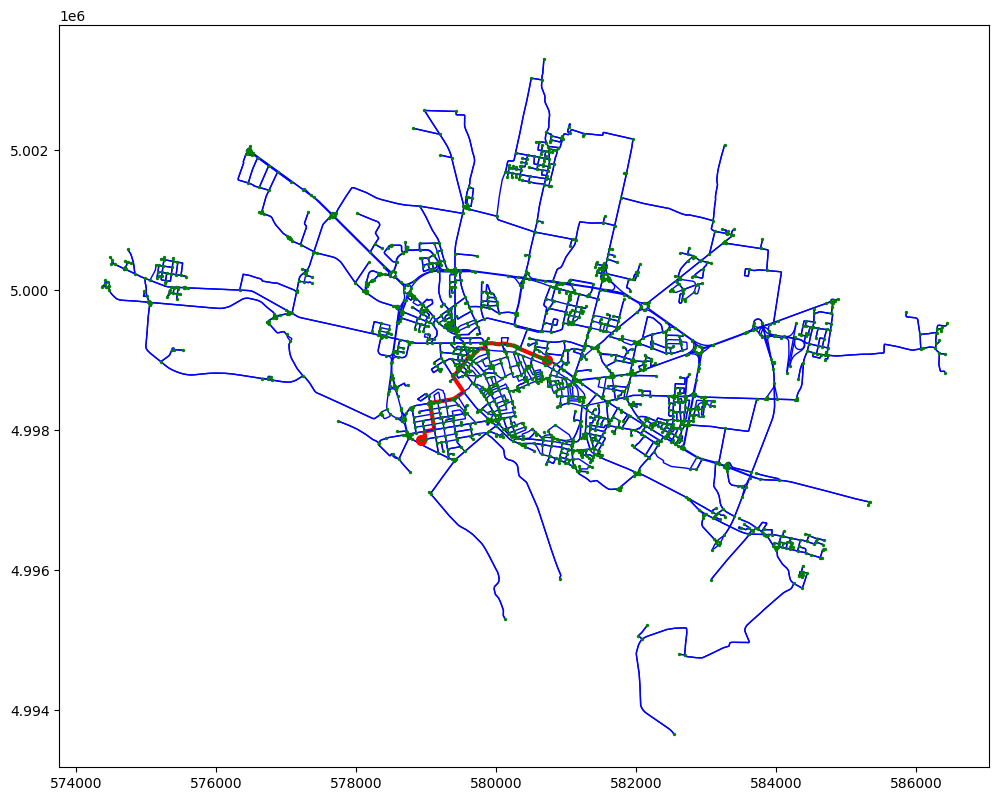

In [142]:
#plot
ec_ztl_traffic = ['r' if edge in routegdf_ztl.index else 'blue' for edge in gdf_edges_ztl.index]
es_ztl_traffic = [3 if edge in routegdf_ztl.index else 1 for edge in gdf_edges_ztl.index]

fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=es_ztl_traffic, edgecolor= ec_ztl_traffic, zorder=1)
#plot the start node
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)
#plot the arrive node
ax.scatter(arrive_node['x'], arrive_node['y'], color='red', s=50)

time_ztl = int(routegdf_ztl['traffic_time'].sum())
print("The time of the route is: ", time_ztl, "s")

In [143]:
routegdf_ztl['traffic_speed'].mean()

31.514469674939196

In [144]:
#export
routegdf_ztl = routegdf_ztl.to_crs("EPSG:4326")
routegdf_ztl.to_file("route_ztl_traffic.geojson", driver='GeoJSON')

In [145]:
# start and arrive swapped
route_ztl_traffic_reverse = nx.shortest_path(prj_G_ztl_traffic, arrive, start, weight='traffic_time')
routegdf_ztl_reverse = ox.routing.route_to_gdf(prj_G_ztl_traffic, route_ztl_traffic_reverse, weight='length')

The time of the route is:  478 s


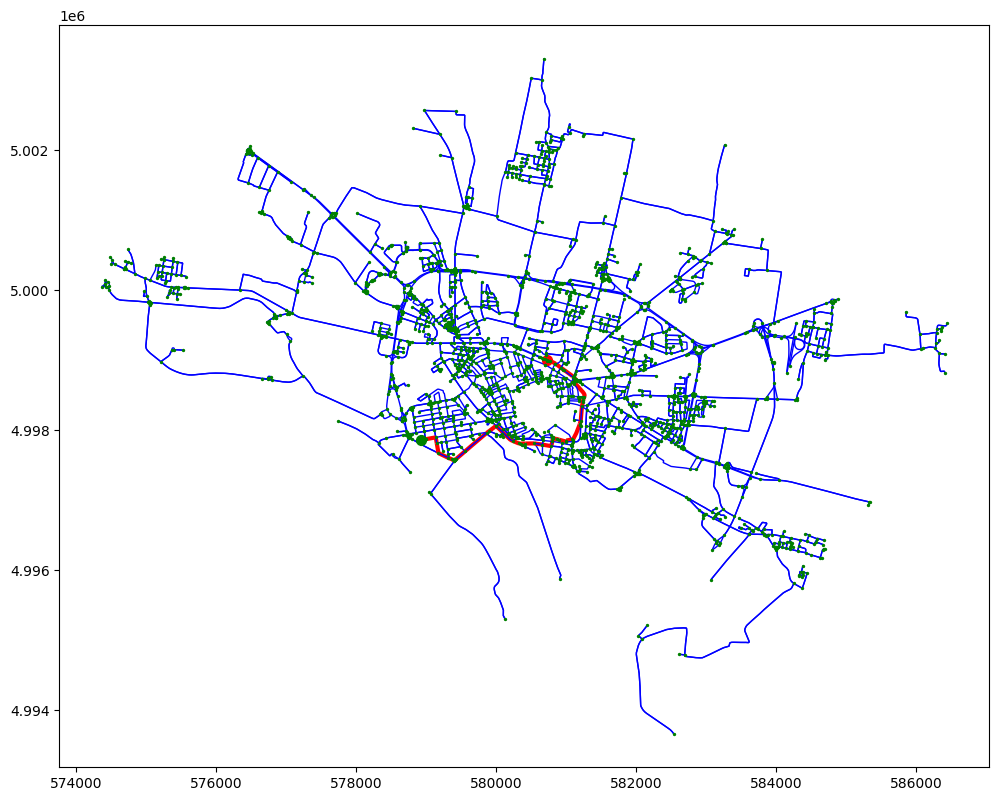

In [146]:
#plot
ec_ztl_traffic_reverse = ['r' if edge in routegdf_ztl_reverse.index else 'blue' for edge in gdf_edges_ztl.index]
es_ztl_traffic_reverse = [3 if edge in routegdf_ztl_reverse.index else 1 for edge in gdf_edges_ztl.index]

fig, ax = plt.subplots(figsize=(12,12))
gdf_nodes_ztl.plot(ax=ax, color='green', zorder=2, markersize=2)
gdf_edges_ztl.plot(ax=ax, linewidth=es_ztl_traffic_reverse, edgecolor= ec_ztl_traffic_reverse, zorder=1)

ax.scatter(arrive_node['x'], arrive_node['y'], color='green', s=50)
ax.scatter(start_node['x'], start_node['y'], color='red', s=50)

time_ztl_reverse = int(routegdf_ztl_reverse['traffic_time'].sum())
print("The time of the route is: ", time_ztl_reverse, "s")



In [147]:
#export
routegdf_ztl_reverse = routegdf_ztl_reverse.to_crs("EPSG:4326")
routegdf_ztl_reverse.to_file("route_ztl_traffic_reverse.geojson", driver='GeoJSON')

I very like this road, but let's try to change start and arrive points


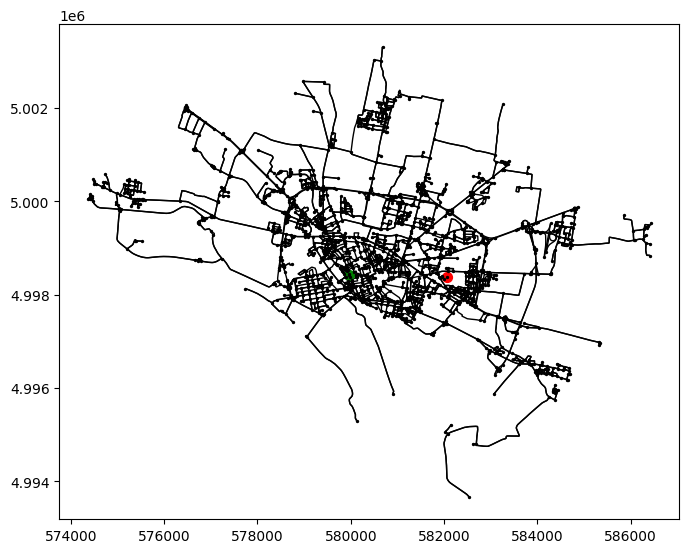

In [134]:
#randomly pickiing a node
random_start = np.random.choice(gdf_nodes.index)
random_start_node = gdf_nodes.loc[random_start]

random_arrive = np.random.choice(gdf_nodes.index)
random_arrive_node = gdf_nodes.loc[random_arrive]

f , ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='black', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth=1, edgecolor='black', zorder=1)
ax.scatter(random_start_node['x'], random_start_node['y'], color='green', s=50)
ax.scatter(random_arrive_node['x'], random_arrive_node['y'], color='red', s=50)


The length of the route is:  3235 m
The time of the route is:  522 s
The average speed of the route is:  24.205892246805597 km/h


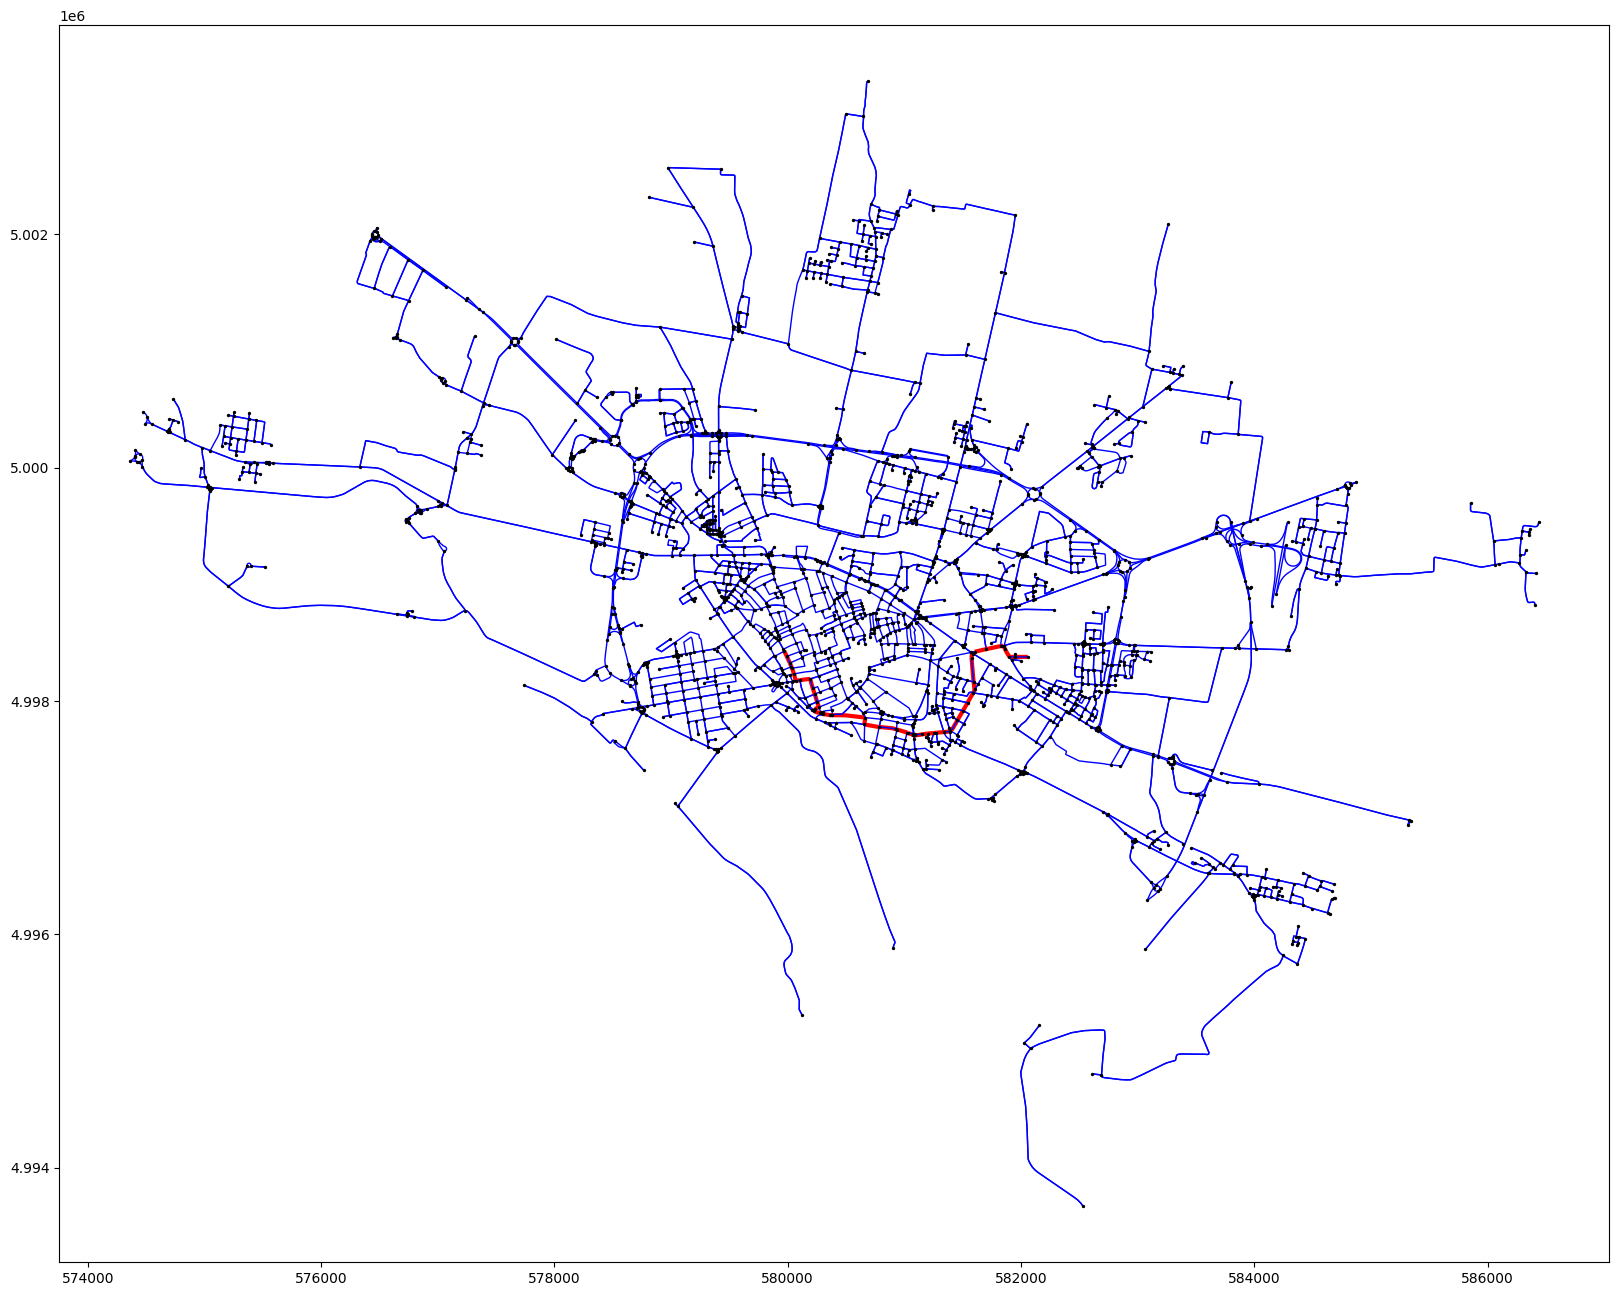

In [137]:
# shortest path
route_random = nx.shortest_path(prj_G_ztl_traffic, random_start, random_arrive, weight='traffic_time')
routegdf_random = ox.routing.route_to_gdf(prj_G_ztl_traffic, route_random, weight='length')


ec_random = ['r' if edge in routegdf_random.index else 'blue' for edge in gdf_edges.index]
es_random = [3 if edge in routegdf_random.index else 1 for edge in gdf_edges.index]

f, ax = plt.subplots(figsize=(20,20))
gdf_nodes.plot(ax=ax, color='black', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth= es_random, edgecolor=ec_random, zorder=1)

r_len = int(routegdf_random['length'].sum())
r_time = int(routegdf_random['traffic_time'].sum())
avg_speed = routegdf_random['traffic_speed'].mean()

print("The length of the route is: ", r_len, "m")
print("The time of the route is: ", r_time, "s")
print("The average speed of the route is: ", avg_speed, "km/h")

In [138]:
#bbox that surrounds the route 
route_gdf = gdf_edges.loc[routegdf_random.index]


minx, miny, maxx, maxy = route_gdf.total_bounds
print(minx, miny, maxx, maxy)
#add a bit of margin
minx = minx*0.999
miny = miny*0.9999
maxx = maxx*1.001
maxy = maxy*1.0001






579970.0179691695 4997702.8659853805 582057.3222001584 4998472.280990077


(4997203.095698782, 4998972.128218176)

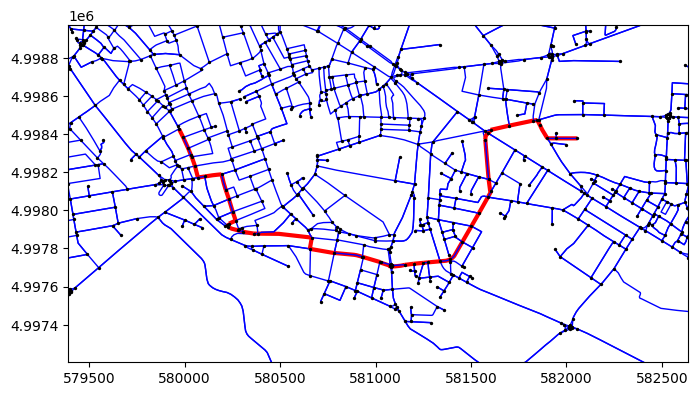

In [139]:
#plot 
f, ax = plt.subplots(figsize=(8,8))
gdf_nodes.plot(ax=ax, color='black', zorder=2, markersize=2)
gdf_edges.plot(ax=ax, linewidth= es_random, edgecolor=ec_random, zorder=1)


ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
